# Statistical Insights and Hypothesis Testing: A Study on Northwind Database
### Applying Hypothesis Tests to the Northwind Sample Database for Data-Driven Insights

### Introduction

Welcome to this analytical project where we delve into the Northwind database to extract actionable business insights. The Northwind database serves as a comprehensive dataset that encapsulates various facets of a business, from customer details to product sales.

### Project Goal

The overarching goal is to employ statistical hypothesis testing to validate or invalidate assumptions about business operations. The insights derived could be pivotal in shaping effective business strategies.

### What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make inferences or educated guesses about a population based on a sample of data. In the context of business, it can be used to validate assumptions made about sales, customer behavior, and other operational metrics.

- **Null Hypothesis (H0):** This is the initial assumption that there is no effect or relationship between variables. It serves as the starting point that we aim to test against.

- **Alternative Hypothesis (Ha):** This is what you want to prove. It is the opposite of the null hypothesis and indicates the presence of an effect or relationship.

**Example:** If we assume that the average spending of customers from two different regions is the same, that's our null hypothesis (H0). The alternative hypothesis (Ha) would be that the average spending is different between these two regions.

### Types of Statistical Tests

We will employ a variety of statistical tests to answer different types of questions:

- **T-Tests:** Used for comparing the means between two groups.

- **Chi-Square Tests:** Ideal for examining the relationship between categorical variables.

- **ANOVA:** Useful for comparing means across three or more groups.

- **Z-Tests:** Employed when the sample size is large, to compare sample and population means.

- **F-Tests:** Used to compare the variances of two different samples.

- **Regression Analysis:** Applied for predicting outcomes based on relationships between variables.

### Importance of Statistical Testing

Statistical tests are crucial for several reasons:

- **Validation:** They help validate or invalidate business assumptions, lending credibility to strategies.

- **Insight Generation:** They can uncover hidden trends and relationships in the data.

- **Risk Mitigation:** They provide a data-backed approach to decision-making, reducing business risks.

- **Strategic Planning:** Empirical data supports the formulation of more effective and targeted business strategies.

Let's dive into the data and start our journey of discovery!


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patches import Rectangle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import pingouin as pg
from scipy.stats import probplot
from scipy.stats import t
from scipy.stats import levene

#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data')

['categories.csv',
 'customers.csv',
 'employees.csv',
 'employee_territories.csv',
 'orders.csv',
 'orders_details.csv',
 'products.csv',
 'regions.csv',
 'shippers.csv',
 'suppliers.csv',
 'territories.csv']

In [3]:
# load data
# Define the list of table names (CSV filenames)
table_names = [
    'categories',
    'customers',
    'employees',
    'employee_territories',
    'orders',
    'orders_details',
    'products',
    #'regions',
    'shippers',
    'suppliers',
    #'territories'
]

# Specify the base directory where your "Data" folder is located
base_directory = r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data'

# Loop through the table names and read each CSV file into a DataFrame
for table in table_names:
    # Construct the full path to the CSV file using os.path.join
    csv_file_path = os.path.join(base_directory, f'{table}.csv')
    
    # Read the CSV file into a DataFrame and assign it to a variable with the same name as the table
    exec(f"{table} = pd.read_csv('{csv_file_path}')")

In [4]:
# load remaining data
regions = pd.read_csv(r'D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\regions.csv')
territories = pd.read_csv(r"D:\Statistical_analysis\Statistical-Analysis-on-Northwind-Sample-Database\Data\territories.csv")

Data Model


![Image Alt Text](https://drive.google.com/uc?export=download&id=1tTeLCT-niYwD-q8pQzw9RdrWZ4Me2A6_)


## 1.Investigating the Impact of Discounts on Product Orders

## Does offering discounts significantly influence the quantity of products ordered by customers? If so, which discount levels are most effective?

## Experimental Design: Analyzing the Impact of Sales Discounts on Order Quantity

### Background
Sales discounts are a strategic tool employed by businesses to boost revenue. By attracting more customers and incentivizing larger purchases, discounts can significantly enhance sales volume. However, the key lies in determining the optimal discount level that maximizes revenue without compromising profit margins.

### Objective
The primary aim of this analysis is to ascertain whether discounts influence the quantity of products ordered by customers. Furthermore, we seek to identify which specific discount levels yield the most significant impact on order quantities.

### Data Source
For this analysis, we will utilize the order_details table, which provides comprehensive data on orders, products, and associated discounts.

![Hypothesis Testing Steps](https://drive.google.com/uc?export=download&id=1BDpyYCRkhx2YmflQVohTdASz4ahMeo2R)

*Image Source: [Hypothesis Testing Steps](https://medium.com/analytics-vidhya/hypothesis-testing-steps-235d2670cad4)*

### Hypotheses
- **Null Hypothesis (H0):** The average quantity of product ordered is the same for orders with and without a discount.
  
- **Alternative Hypothesis (Ha):** The average quantity of product ordered when a discount is given is higher or lower than for orders without a discount.


#### EDA 

In [6]:
orders_details.head()

,orderid,productid,unitprice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [7]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderid    2155 non-null   int64  
 1   productid  2155 non-null   int64  
 2   unitprice  2155 non-null   float64
 3   quantity   2155 non-null   int64  
 4   discount   2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


No Missing values, data is clean

In [8]:
# descriptive analysis of the data
orders_details.describe() 

,orderid,productid,unitprice,quantity,discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


* The quantity column, which we are primarily interested in, has values ranging from 1 to 130 with a mean of approximately 23.81.
* The discount column values range from 0 (no discount) to 0.25 (25% discount) with an average discount of approximately 5.62%.

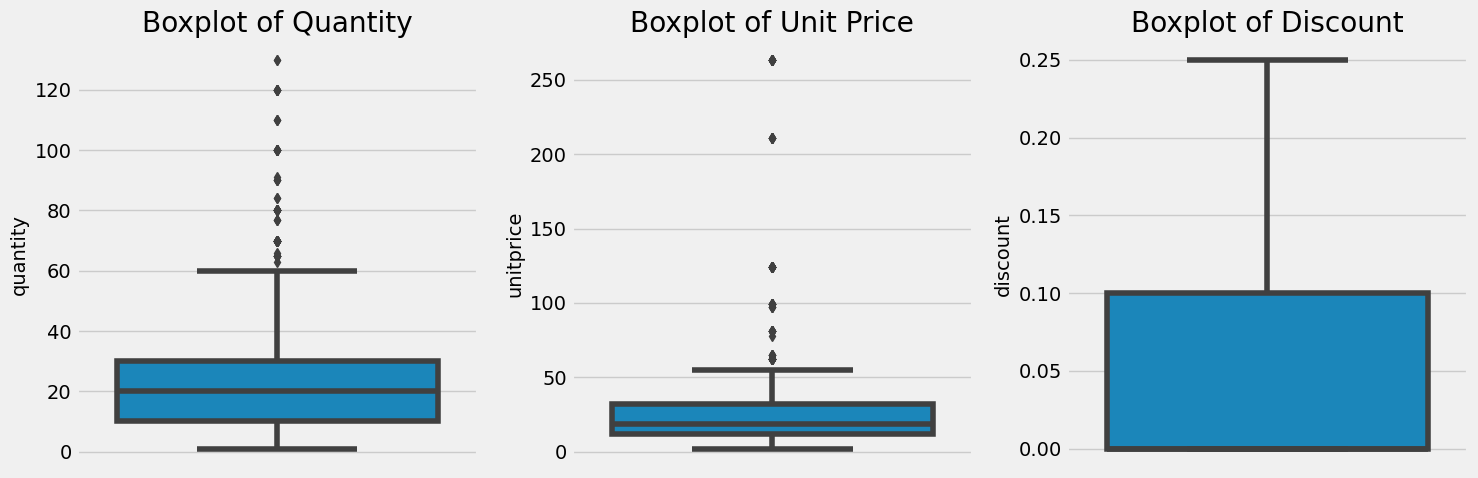

In [9]:
# Plotting box plots to visualize outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(y=orders_details['quantity'], ax=ax[0])
ax[0].set_title('Boxplot of Quantity')

sns.boxplot(y=orders_details['unitprice'], ax=ax[1])
ax[1].set_title('Boxplot of Unit Price')

sns.boxplot(y=orders_details['discount'], ax=ax[2])
ax[2].set_title('Boxplot of Discount')

plt.tight_layout()
plt.show()


Outliers:

Quantity: There are some higher order quantities that are considered outliers, but these might be bulk orders or specific promotions.

Unit Price: There are several outliers on the higher end. This suggests some products are priced significantly higher than others.

Discount: The data seems fairly consistent, with no significant outliers. However, there are some discounts around 1-6% that appear less frequent than others.

Given the nature of the data (sales/orders), it's plausible to have outliers, especially for bulk orders or premium products. We'll keep these in mind as we proceed, but we won't remove them just yet. Business context and further analysis will guide us on how to handle them.

In [10]:
orders_details['discount'].value_counts()  # to see the level of discounts values

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.04       1
0.06       1
0.01       1
Name: discount, dtype: int64

In [11]:
# create a new data frame showing the percentage by discount amount.
# Group by 'discount' and count the number of 'productid' for each discount amount
disc_given = orders_details.groupby('discount').agg({'productid':'count'}).reset_index().rename(columns={'productid':'Discounts', 'discount':'Discount_amount'})

# Calculate the percentage discount
disc_given['disc_per'] = round((disc_given.Discounts / disc_given.Discounts.sum()) * 100, 2)


# Display the resulting dataframe
disc_given.head(10)


,Discount_amount,Discounts,disc_per
0,0.00,1317,61.11
1,0.01,1,0.05
2,0.02,2,0.09
3,0.03,3,0.14
4,0.04,1,0.05
5,0.05,185,8.58
6,0.06,1,0.05
7,0.10,173,8.03
8,0.15,157,7.29
9,0.20,161,7.47


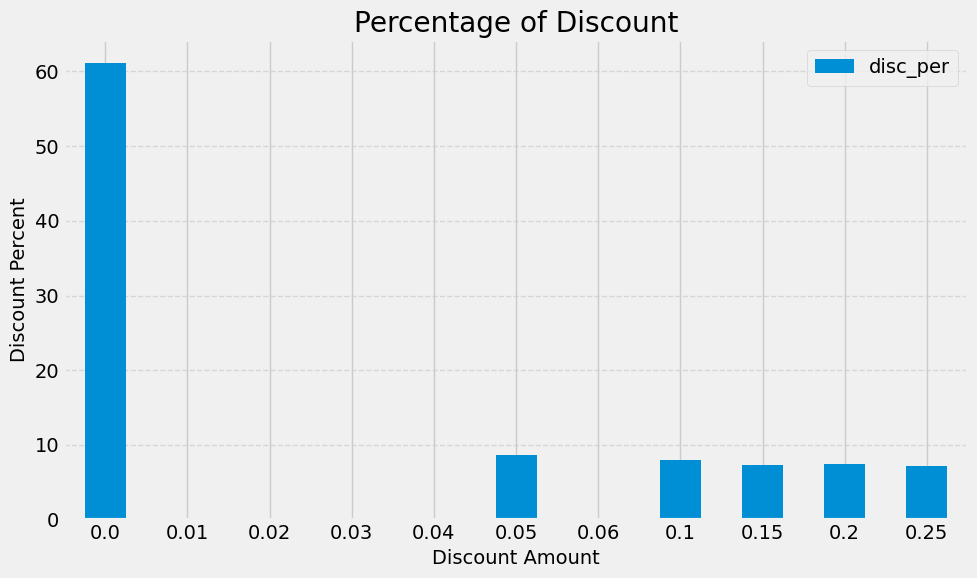

In [12]:
# plot the percentage discount

disc_given.plot(x='Discount_amount', y='disc_per', kind='bar', figsize=(10, 6))
plt.xlabel('Discount Amount')
plt.ylabel('Discount Percent')
plt.title('Percentage of Discount')
plt.legend(loc='upper right')  # Adjusting the legend position for clarity
plt.xticks(rotation=0)  # Ensuring the x-axis labels are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
#create control and experimental groups

population = orders_details['quantity']
non_disc = orders_details[orders_details['discount']==0]
non_disc = non_disc['quantity']

disc = orders_details[orders_details['discount']!=0]
disc = disc['quantity']

In [14]:
# finding the mean for the discounted & non discounted group
disc_ave=disc.mean()
print (f'The average quantity for discounted orders is {disc_ave }')
nondisc_ave=non_disc.mean()
print (f'The average quantity for non discounted orders is {nondisc_ave }')

The average quantity for discounted orders is 27.10978520286396
The average quantity for non discounted orders is 21.715261958997722


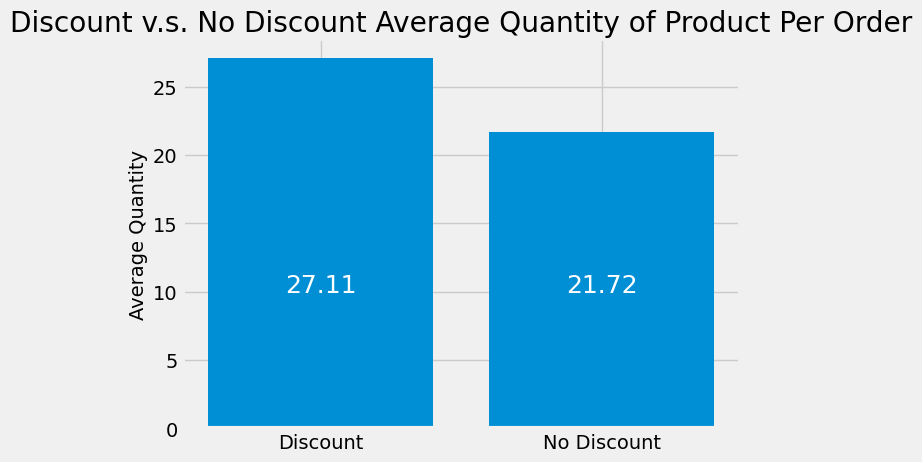

In [15]:
X = ['Discount', 'No Discount']
y = [disc.mean(),
     non_disc.mean()]
plt.bar(X,y)
plt.text(s=round(y[1],2), x=1, y=10, color="w", horizontalalignment='center',size=18)
plt.text(s=round(y[0],2), x=0, y=10, color="w", horizontalalignment='center',size=18)
plt.ylabel('Average Quantity')
plt.title('Discount v.s. No Discount Average Quantity of Product Per Order')
plt.show()

Upon examining the average order quantities, it's evident that orders with discounts tend to have a higher average compared to those without discounts. However, to ensure that this observed difference isn't merely a result of random variation, we'll proceed with a hypothesis test.

## Checking for Assumptions: Normality & Randomness

### Before delving into the hypothesis test, it's crucial to ensure our data meets certain assumptions:

**Randomness:** The observations in our dataset should be random, ensuring there's no underlying pattern or bias.

**Normality:** The distribution of the data should approximate a normal distribution. This is especially important for certain statistical tests.

**Population Size:** Given the manageable size of our dataset, we're analyzing the entire population. This eliminates concerns related to sampling bias and sampling error.

With these assumptions in mind, our immediate next step is to assess the normality of our data distribution.


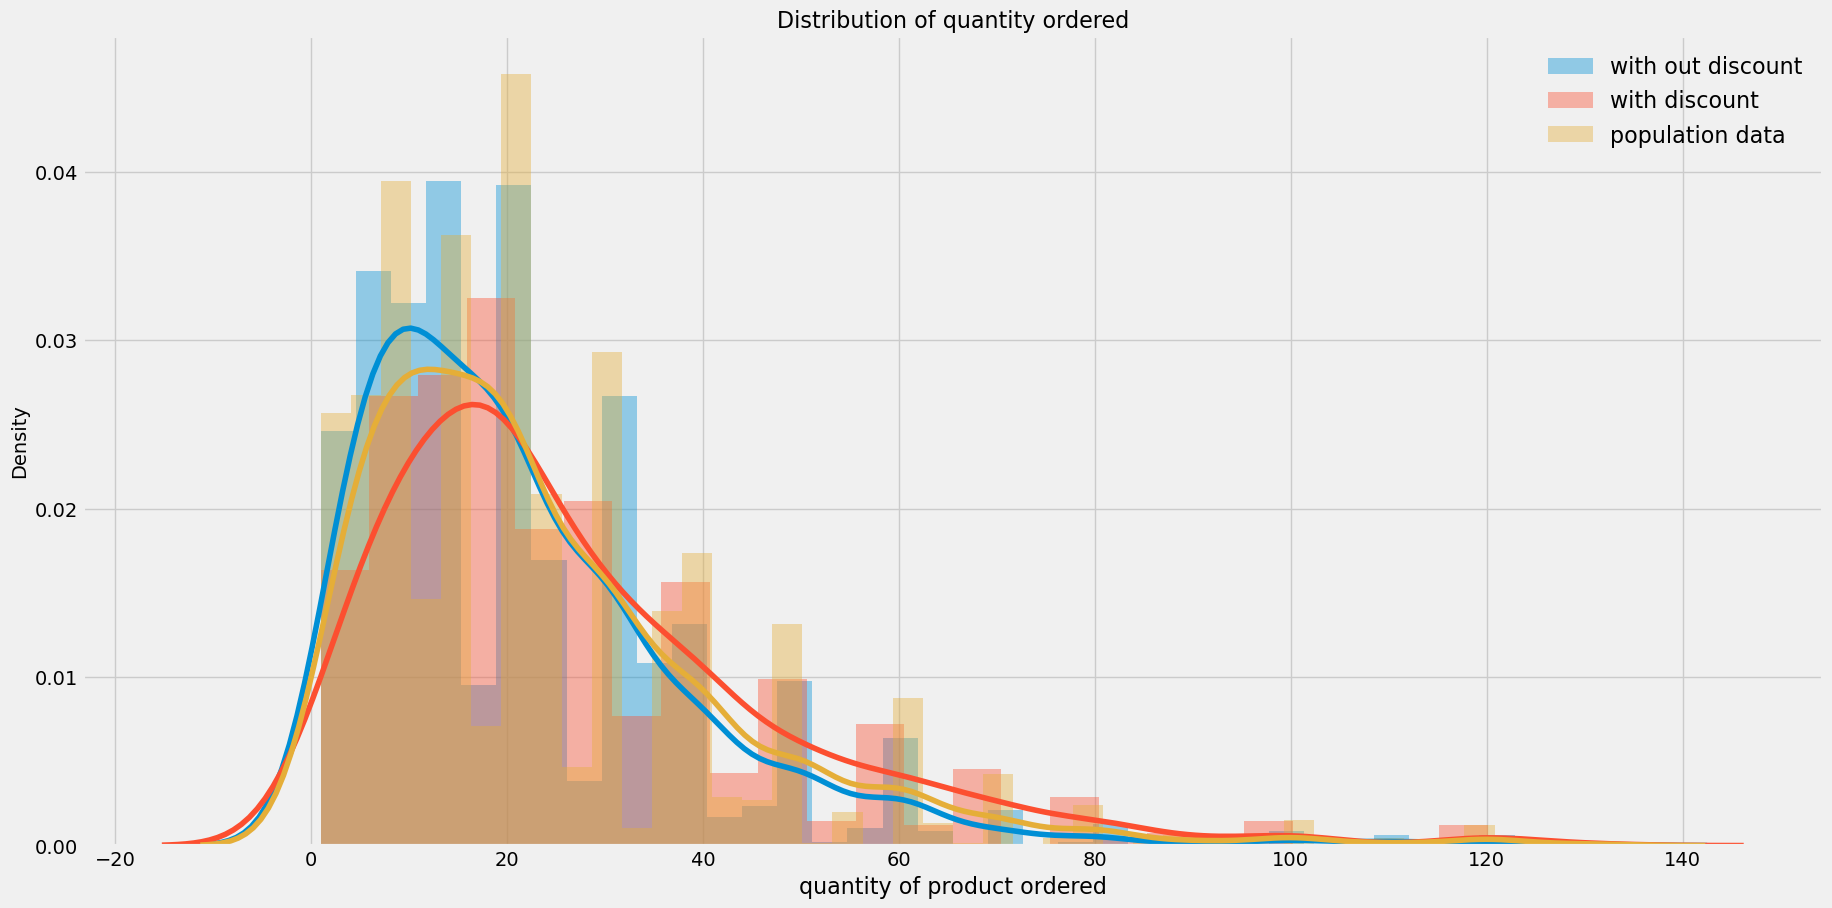

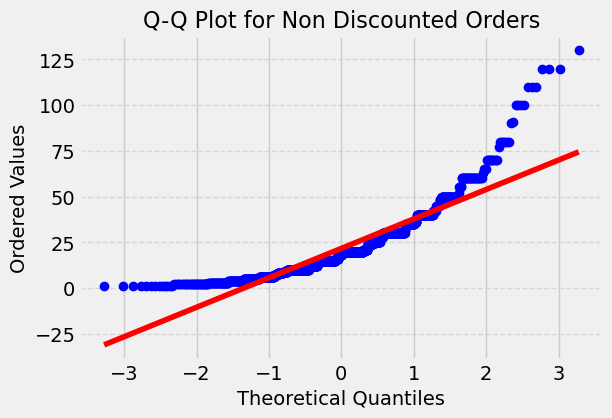

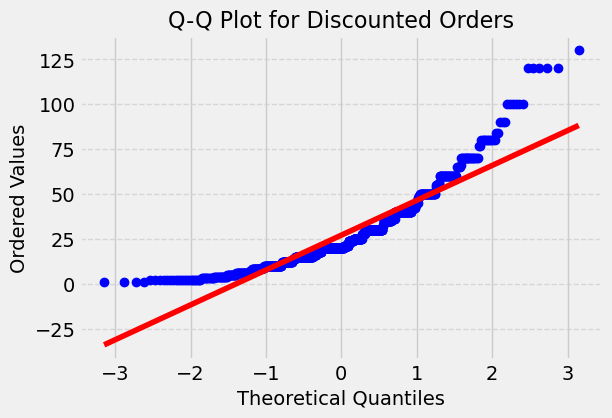

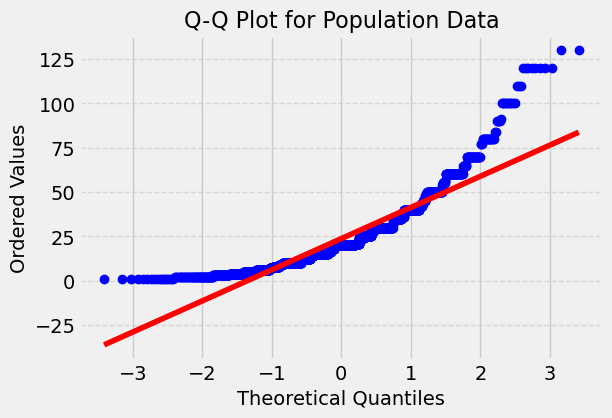

In [16]:
# Normality check 

#plotting the two groups & the population to check for normality
plt.figure(figsize=(20, 10))
sns.distplot(non_disc, label='with out discount')
sns.distplot(disc, label='with discount')
sns.distplot(population, label='population data')
plt.title('Distribution of quantity ordered', fontsize=16)
plt.xlabel('quantity of product ordered', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')
plt.show()

# Function to plot Q-Q plot
def plot_qq(data, title):
    plt.figure(figsize=(6, 4))
    probplot(data, dist="norm", plot=plt)
    plt.title(title, fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=14)
    plt.ylabel('Ordered Values', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Q-Q plot for non_disc
plot_qq(non_disc, 'Q-Q Plot for Non Discounted Orders')

# Q-Q plot for disc
plot_qq(disc, 'Q-Q Plot for Discounted Orders')

# Q-Q plot for population
plot_qq(population, 'Q-Q Plot for Population Data')

The visualizations indicate that all distributions exhibit right-skewness and deviate from normality. To further validate this observation, we'll employ the Shapiro-Wilk test for normality.

### Shapiro-Wilk Test
#### H0: Distribution is normal
#### HA: Distribution is not normal


In [17]:
stats.shapiro(disc)  #to test if the discounted group distribution is normal

ShapiroResult(statistic=0.8690298795700073, pvalue=6.881066043300527e-26)

KS test is another test to check the for normality and it needs the info for population mean standard deviation. 

In [18]:
population.mean(),population.std()

(23.812993039443157, 19.022046977493545)

In [19]:
# using KS test to check for nornmality
stats.kstest(disc, 'norm', args=(23.81, 19.02))

KstestResult(statistic=0.12098208878960003, pvalue=3.802483260016832e-11, statistic_location=2, statistic_sign=-1)

#### Given that the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This suggests that the distribution of the discounted group does not follow a normal distribution.

In [20]:
stats.shapiro(non_disc) # to test if the non discounted group is normal

ShapiroResult(statistic=0.8434569835662842, pvalue=3.8037236246970394e-34)

#### Given that the p-value is less than 0.05, we have sufficient evidence to reject the null hypothesis. This suggests that the distribution of the non discounted group does not follow a normal distribution.

In [21]:
print(len(disc))
print(len(non_disc))

838
1317


### Selecting the Appropriate Test Statistic

When analyzing our data, it's essential to choose the right statistical test to ensure valid results. One of the primary considerations is the distribution of the data.

**Normality and Sample Size**

While our data does not strictly adhere to the normality assumption, we can take solace in the Central Limit Theorem. This theorem states that, given a sufficiently large sample size (typically considered to be more than 30), the sampling distribution of the mean will be approximately normal, regardless of the distribution of the underlying data. Given that our sample size is large, we can confidently proceed with the t-test.

**Assessing Variance with the Levene Test**

Before selecting the specific type of t-test, it's crucial to determine if the variances of our two groups (discounted and non-discounted) are equal. The Levene test is a tool that helps us test this assumption.

**Hypotheses for the Levene Test:**

- Null Hypothesis (H0): The variance in the discounted group is equal to the variance in the non-discounted group.

- Alternative Hypothesis (HA): The variance in the discounted group is not equal to the variance in the non-discounted group.

By understanding the variances, we can select the most appropriate version of the t-test for our analysis.


In [22]:
#Testing for equal variance between the discounted & non discounted group
stats.levene(disc, non_disc)

LeveneResult(statistic=14.832671704073421, pvalue=0.00012091378376079568)

##### With low p value we reject the null hypothesis and conclude that the two groups have different variances. since the two groups have different sample sizes & variances Welch's t test the appropriate test.

In [23]:
# Welch's t test between discounted & non discounted group
stats.ttest_ind(disc, non_disc, equal_var=False)

Ttest_indResult(statistic=6.239069142123972, pvalue=5.65641429030433e-10)

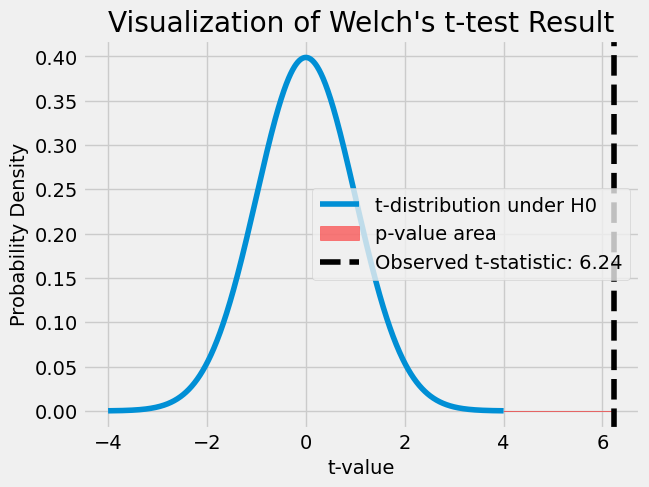

In [24]:
t_stat, p_value = stats.ttest_ind(disc, non_disc, equal_var=False)

# Degrees of freedom for Welch's t-test
df = len(disc) + len(non_disc) - 2

# Generate values for t-distribution
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Plot t-distribution
plt.plot(x, y, label="t-distribution under H0")

# Highlight area under curve beyond observed t-statistic
x_fill = np.linspace(t_stat, 4, 100)
y_fill = t.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label="p-value area")

# Indicate observed t-statistic
plt.axvline(t_stat, color='black', linestyle='--', label=f"Observed t-statistic: {t_stat:.2f}")

plt.title("Visualization of Welch's t-test Result")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

Another test  we can use is Monte Carlo test. This test doesn't require the normality assumption and it is the best choice when the data is not normal. 

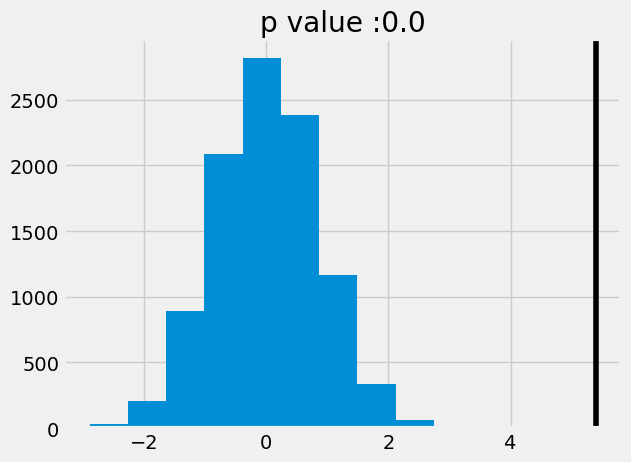

In [25]:
# monte carlo simulation to calculate p value

mean_diff = disc.mean() - non_disc.mean()
sample_diffs = []
counter = 0
for i in range(10000):
    sample1 = orders_details.sample(replace=False, n=len(disc))
    sample2 = orders_details.drop(sample1.index,axis=0)
    sample_diff = sample1['quantity'].mean() - sample2['quantity'].mean()
    sample_diffs.append(sample_diff)
    if sample_diff > mean_diff:
        counter += 1
plt.hist(sample_diffs)
plt.axvline(mean_diff,color = 'k')
plt.title(f'p value :{np.round(counter/10000,3)}')
plt.show()

#### Based on the results from both the Monte Carlo simulation and the Welch's t-test, we observe a p-value less than 0.05. This leads us to reject the null hypothesis, suggesting that discounts do indeed have a statistically significant impact on the quantity of products purchased.

#### To check how high the effect is we check the effect size by using Cohen's D test.his is a measure of effect size used specifically for the difference between two means. It's calculated as the difference between the two means divided by the pooled standard deviation. A larger absolute value of Cohen's d indicates a larger effect size

In [26]:
# create a function to calculate Cohen's D for any two given groups

def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    n1,n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2*var2)/(n1+n2)
    # Calculate Cohen's d statistic
    d = diff/ np.sqrt(pooled_var)
   
    return d

In [27]:
round(abs(Cohen_d(non_disc, disc)), 1) # taking absolute value of Cohen's d and round is to 1 decimal point

0.3

In [28]:
def cohens_d_confidence_interval(group1, group2, alpha=0.05):
    # Calculate Cohen's D
    d = Cohen_d(group1, group2)
    
    # Calculate the variance and sample size for each group
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    # Calculate the standard error of d
    sed = np.sqrt((var1/n1 + var2/n2)**2 / (n1 + n2))
    
    # Calculate the confidence interval
    df = n1 + n2 - 2
    ci_low = d - stats.t.ppf(1 - alpha/2, df) * sed
    ci_high = d + stats.t.ppf(1 - alpha/2, df) * sed
    
    return ci_low, ci_high

# Calculate the 95% CI for Cohen's D
ci_low, ci_high = cohens_d_confidence_interval(disc, non_disc)
print(f"The 95% confidence interval for Cohen's D is ({ci_low:.3f}, {ci_high:.3f})")

The 95% confidence interval for Cohen's D is (0.255, 0.318)


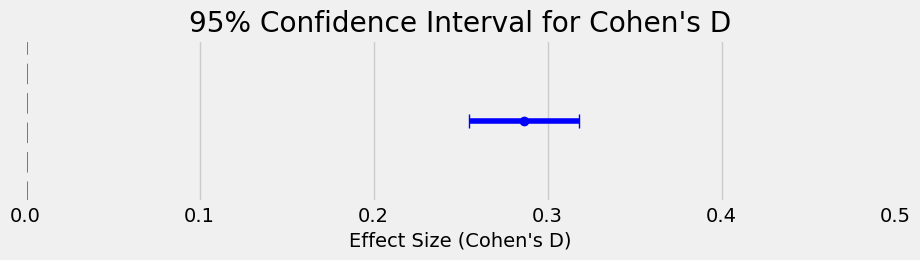

In [29]:
# Values
effect_size = (ci_low + ci_high) / 2
error = (ci_high - ci_low) / 2

# Plot
plt.figure(figsize=(10, 2))
plt.errorbar(effect_size, 0, xerr=error, fmt='o', color='blue', capsize=5)
plt.yticks([])
plt.xlim(0, 0.5)
plt.title("95% Confidence Interval for Cohen's D")
plt.xlabel("Effect Size (Cohen's D)")
plt.axvline(0, color='red', linestyle='--')
plt.show()

#### Effect Size Analysis using Cohen's D
#### The calculated Cohen's D value for our data is 0.3. This value falls within the "small" effect size range, suggesting that while the discount does have a statistically significant impact on the quantity sold, the magnitude of this effect is relatively modest.

### Analyzing the Impact of Different Discount Levels

To understand the influence of discounts on sales, it's crucial not only to determine if discounts have an effect, but also to discern whether different discount levels vary in their impact. This requires a comparison across multiple discount levels.

**ANOVA (Analysis of Variance)** is a powerful statistical method that allows us to make these comparisons and determine if the differences between the groups (discount levels) are statistically significant.

**Hypotheses:**

- Null Hypothesis (H₀): The mean quantity of products ordered remains consistent across all discount levels.

- Alternative Hypothesis (Hₐ): At least one discount level has a different mean quantity of products ordered compared to the others.

By conducting the ANOVA test, we aim to either accept the null hypothesis, suggesting that discount levels don't significantly vary in their effect, or reject it in favor of the alternative, indicating varying impacts of different discount levels.


In [30]:
# since we have very few discounts with less than .1 we combine them toghether as one value .05

disc_data =orders_details[orders_details['discount'] > 0 ]
disc_data['discount'] = disc_data['discount'].apply(lambda x:0.05 if (x > 0) and (x< 0.10) else x)
disc_data['discount'].value_counts()

0.05    193
0.10    173
0.20    161
0.15    157
0.25    154
Name: discount, dtype: int64

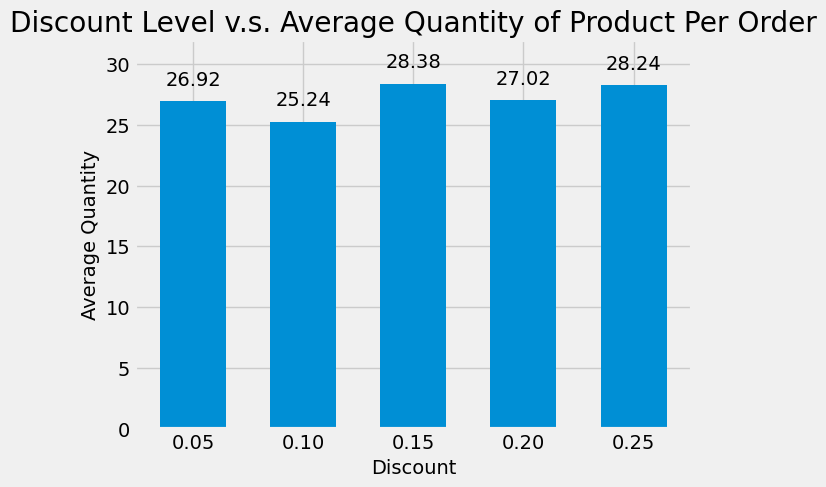

In [31]:
X = []
y = []
for i in disc_data['discount'].unique():
    X.append(i)
    y.append(disc_data['quantity'][disc_data['discount'] == i].mean())
ax = plt.bar(X,y,width=.03)
plt.ylim(0,32)
plt.ylabel('Average Quantity')
plt.xlabel('Discount')
plt.title('Discount Level v.s. Average Quantity of Product Per Order')
rects = ax.patches
y_round = []
for i in y:
    y_round.append(round(i,2))
labels = y_round
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')
    


From the plot , we see that there is no pattern between the different discounts but we have to check that if this is not happening due to randomness using ANOVA test.

In [32]:
# using anova test to see  quantity & discount
# Fit the model
model  = ols('quantity ~ C(discount)', data = disc_data).fit()

# Perform ANOVA and Print the table

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(discount),4.0,1065.701253,266.425313,0.616376,0.650947
Residual,833.0,360060.198508,432.245136,NaN,NaN


### Results

The p-value for the 'Discount' variable in our analysis is 0.651. Given our chosen significance level (alpha) of 0.05, this p-value suggests that we fail to reject the null hypothesis. This indicates that the average quantities of products ordered across the various discount levels do not differ significantly.

### Conclusion

Based on our data exploration and statistical tests, we can draw the following conclusions:

- Providing a discount has a minor influence on the average quantity of products ordered.
- There isn't a significant difference in order quantities among the various discount levels.

Given the results of our ANOVA test, there's no need for post-hoc tests, as the different discount levels don't show significant differences in their effects on order quantities.


# 2 Problem Statement

## Does discount has an effect on the quantity ordered across the regions?

## Hypotheses

- Null Hypothesis (H₀): The effect of discount is the same across the regions.

- Alternative Hypothesis (Hₐ): The effect of discount is different across the regions.


In [52]:
country_to_region = {
    'USA': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    
    'UK': 'British Isles',
    'Ireland': 'British Isles',
    
    'Germany': 'Western Europe',
    'France': 'Western Europe',
    'Spain': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Austria': 'Western Europe',
    'Belgium': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Portugal': 'Southern Europe',
    'Sweden': 'Scandinavia',
    'Denmark': 'Scandinavia',
    'Finland': 'Scandinavia',
    'Norway': 'Scandinavia',
    
    'Brazil': 'South America',
    'Venezuela': 'South America',
    'Argentina': 'South America',
    
    'Poland': 'Eastern Europe'
    
    # Add any other countries and their respective regions as needed
}


customers['new_region'] = customers['country'].map(country_to_region)
customers['new_region'].fillna(customers['region'], inplace=True)
customers['region'] = customers['new_region']
customers.drop('new_region', axis=1, inplace=True)




### Country-to-Region Mapping

The `country_to_region` dictionary is defined to map countries to their respective regions. For instance, 'USA', 'Canada', and 'Mexico' are mapped to 'North America'.

#### Mapping Countries to Regions in DataFrame

Using the `map` function, we create a new column `new_region` in the `customers` DataFrame. This column contains the region values based on the country of each customer.

#### Handling Unmapped Countries

If there are countries in the DataFrame that aren't present in the `country_to_region` dictionary, their region values will be NaN in the `new_region` column. We handle this by filling these NaN values with the original values from the 'region' column.

#### Updating the Original 'region' Column

Finally, we update the original 'region' column with the values from `new_region` and then drop the `new_region` column to keep the DataFrame clean.


In [54]:
# Merge the orders_details with orders on "orderid"
merged_orders = pd.merge(orders_details, orders, left_on="orderid", right_on="orderid", how="inner")

# Merge the result with customers on "customerid" to get the region
orders_region = pd.merge(merged_orders, customers[['customerid', 'region']], left_on="customerid", right_on="customerid", how="inner")

# Keep only the necessary columns
orders_region = orders_region[['region', 'orderid', 'productid', 'discount', 'quantity']]


In [55]:
orders_region.head()

,region,orderid,productid,discount,quantity
0,Western Europe,10248,11,0.0,12
1,Western Europe,10248,42,0.0,10
2,Western Europe,10248,72,0.0,5
3,Western Europe,10274,71,0.0,20
4,Western Europe,10274,72,0.0,7


In [57]:
nondiscorder_reg = orders_region[orders_region['discount'] == 0]
discorder_reg = orders_region[orders_region['discount'] != 0]

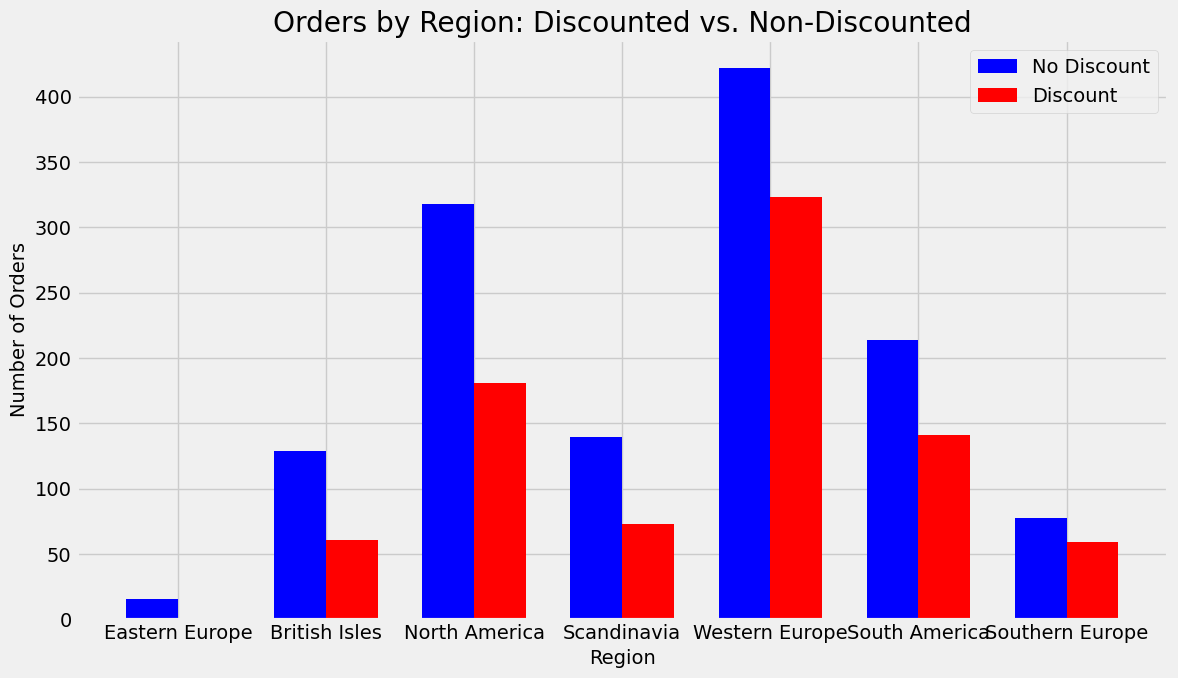

In [63]:
# Get a combined list of unique regions from both groups
all_regions = nondiscorder_reg['region'].unique().tolist() + discorder_reg['region'].unique().tolist()
all_regions = list(set(all_regions))

# Reindex and fill NaN values with 0
nondiscorder_counts = nondiscorder_counts.reindex(all_regions, fill_value=0)
discorder_counts = discorder_counts.reindex(all_regions, fill_value=0)

# Set the positions and width for the bars
bar_width = 0.35
index = range(len(nondiscorder_counts))

# Create the bars
fig, ax = plt.subplots(figsize=(12,7))
bar1 = ax.bar(index, nondiscorder_counts, bar_width, label='No Discount', color='b')
bar2 = ax.bar([i+bar_width for i in index], discorder_counts, bar_width, label='Discount', color='r')

# Describe the data
ax.set_xlabel('Region')
ax.set_ylabel('Number of Orders')
ax.set_title('Orders by Region: Discounted vs. Non-Discounted')
ax.set_xticks([i+bar_width/2 for i in index])
ax.set_xticklabels(nondiscorder_counts.index)
ax.legend()

plt.tight_layout()
plt.show()


In [59]:
discorder_reg.groupby('region').mean()

,orderid,productid,discount,quantity
region,,,,
British Isles,10613.704918,38.393443,0.153279,31.327869
North America,10664.005525,39.779006,0.147735,30.303867
Scandinavia,10688.739726,41.232877,0.163699,23.808219
South America,10673.950355,39.758865,0.151773,21.609929
Southern Europe,10624.508475,42.644068,0.126271,17.745763
Western Europe,10644.848297,39.368421,0.136687,29.380805


In [60]:
nondiscorder_reg.groupby('region').mean()

,orderid,productid,discount,quantity
region,,,,
British Isles,10650.093023,41.914729,0.0,19.496124
Eastern Europe,10789.937500,44.937500,0.0,12.812500
North America,10673.971698,39.849057,0.0,21.553459
Scandinavia,10630.864286,42.307143,0.0,19.378571
South America,10678.691589,40.280374,0.0,20.911215
Southern Europe,10681.858974,41.769231,0.0,13.153846
Western Europe,10652.433649,42.464455,0.0,25.618483


Normality Check

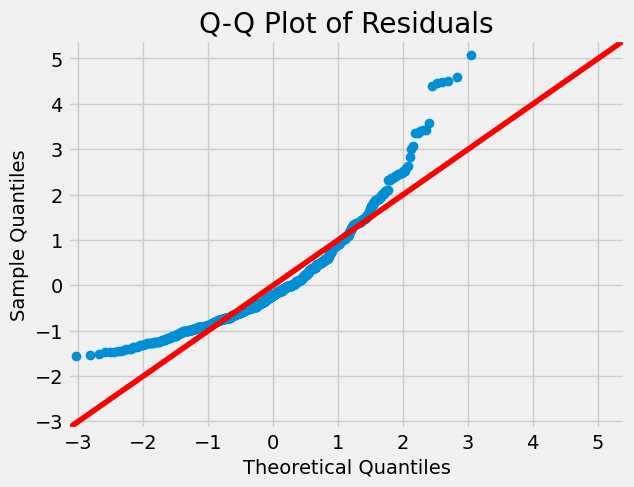

Statistics=0.892, p=0.000
Residuals do not look Gaussian (reject H0)


In [64]:
# Fit the model
model = ols('quantity ~ C(region) + C(discount)', data=discorder_reg).fit()

# 1. Visual Inspection using Q-Q Plot
residuals = model.resid
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 2. Statistical Test using Shapiro-Wilk
stat, p = stats.shapiro(residuals)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Residuals look Gaussian (fail to reject H0)')
else:
    print('Residuals do not look Gaussian (reject H0)')

Given that we are working with a dataset that represents population data and has a substantial sample size, we can proceed with the ANOVA analysis. The Central Limit Theorem posits that, for large sample sizes, the sampling distribution of the mean will approximate a normal distribution, even if the underlying data itself is not normally distributed. As such, ANOVA results are often considered reliable in these circumstances, even if the data doesn't adhere perfectly to the normality assumption. However, it's crucial to interpret the results with caution, bearing in mind the potential deviation from the normality assumption.

In [66]:
# ANOVA test quantity vs regions 

model = ols('quantity ~ C(region)', data= discorder_reg).fit()
# Perform ANOVA and Print the table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),14831.961246,5.0,7.127004,0.000002
Residual,346293.938515,832.0,NaN,NaN


##### With p value less than 0.05 we reject the null hypothesis and that means is discount has a significant effect on the quantities purchased across the different regions.          which region has higher effect? 

#### H0 (Null Hypothesis): The average quantity of products sold with a discount is the same across all compared regions.

#### Ha (Alternative Hypothesis): The average quantity of products sold with a discount is different for at least one pair of compared regions.

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define the data and groups for the test
data = discorder_reg['quantity']
groups = discorder_reg['region']

# Perform the test
tukey_results = pairwise_tukeyhsd(data, groups, alpha=0.05)

# Print the results
print(tukey_results)



          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
  British Isles   North America   -1.024 0.9994  -9.6514  7.6034  False
  British Isles     Scandinavia  -7.5196 0.2754 -17.6285  2.5892  False
  British Isles   South America  -9.7179 0.0238 -18.6485 -0.7874   True
  British Isles Southern Europe -13.5821 0.0038 -24.2229 -2.9413   True
  British Isles  Western Europe  -1.9471 0.9838 -10.0824  6.1883  False
  North America     Scandinavia  -6.4956 0.1966 -14.5753   1.584  False
  North America   South America  -8.6939 0.0022 -15.2396 -2.1483   True
  North America Southern Europe -12.5581 0.0006 -21.2942  -3.822   True
  North America  Western Europe  -0.9231 0.9966  -6.3337  4.4876  False
    Scandinavia   South America  -2.1983 0.9759 -10.6008  6.2043  False
    Scandinavia Southern Europe  -6.0625 0.5339 -16.2642  4.1393

In [71]:
# list of regions
regionlist=orders_region.region.unique()

#calculating Cohen's D for each region
for i in regionlist:
    d=Cohen_d(nondiscorder_reg[nondiscorder_reg['region'] ==i]['quantity'], discorder_reg[discorder_reg['region'] == i]['quantity'])
    print (f'effect size for {i} is {round(abs(d),2)}' )

effect size for Western Europe is 0.18
effect size for South America is 0.05
effect size for North America is 0.41
effect size for Scandinavia is 0.32
effect size for Southern Europe is 0.42
effect size for British Isles is 0.7
effect size for Eastern Europe is nan


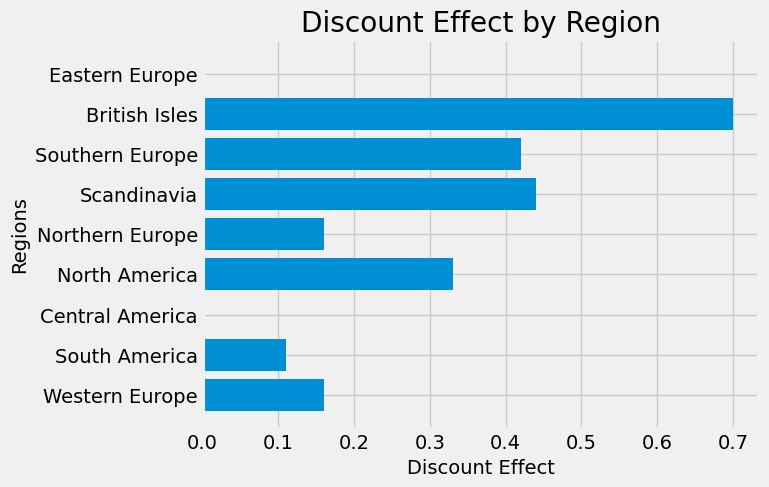

In [73]:
# plot d is  discount effect size by region :
d= [0.16,0.11,0,0.33,0.16,0.44,0.42,0.7,0]
region = ('Western Europe','South America','Central America','North America','Northern Europe','Scandinavia','Southern Europe','British Isles','Eastern Europe')
y_pos = np.arange(len(region))
# Create bars
plt.barh(y_pos, d)
# Create names on the x-axis
plt.yticks(y_pos, region)
# Show graphic
plt.ylabel('Regions')
plt.xlabel('Discount Effect')
plt.title('Discount Effect by Region')
plt.show()


### Summary

**British Isles vs. South America:** The average quantity in the British Isles is significantly higher by approximately 9.72 units compared to South America.

**British Isles vs. Southern Europe:** The average quantity in the British Isles is significantly higher by approximately 13.58 units compared to Southern Europe.

**North America vs. South America:** The average quantity in North America is significantly higher by approximately 8.69 units compared to South America.

**North America vs. Southern Europe:** The average quantity in North America is significantly higher by approximately 12.56 units compared to Southern Europe.

**South America vs. Western Europe:** The average quantity in South America is significantly lower by approximately 7.77 units compared to Western Europe.

**Southern Europe vs. Western Europe:** The average quantity in Southern Europe is significantly lower by approximately 11.64 units compared to Western Europe.

**From the results:**

- The British Isles region has a significantly higher average quantity compared to both South America and Southern Europe. This suggests that the discount has the highest effect on the average quantity in the British Isles region.

- Scandinavia does not have a significant difference in average quantity compared to most other regions, except for a slight difference with the British Isles (but this is not statistically significant).

- Southern Europe has a significantly lower average quantity compared to Western Europe, suggesting that the discount has a lesser effect in Southern Europe.

**In summary,** the discount seems to have the highest effect on the average quantity in the British Isles region, followed by regions like North America. The regions where the discount has a lesser effect include South America and Southern Europe.


## Does the lateness of deliveries influence the frequency or volume of orders placed by customers ?

### Null Hypothesis (H0): Late deliveries have no effect on the frequency or volume of orders placed by customers.

### Alternative Hypothesis (H1): Late deliveries lead to a decrease in the frequency or volume of orders placed by customers.

In [83]:
# Merge (JOIN) the orders and orders_details dataframes on the 'orderid' column
merged_df = pd.merge(orders, orders_details, on='orderid')

# Group by 'orderid' and aggregate the required columns
ordersl = merged_df.groupby('orderid').agg({
    'customerid': 'first',
    'orderdate': 'first',
    'requireddate': 'first',
    'shippeddate': 'first',
    'shipvia': 'first',
    'productid': 'first',
    'unitprice': 'sum',
    'quantity': 'sum',
    'discount': 'sum'
})

# Calculate the OrderTotal column
ordersl['OrderTotal'] = ordersl['unitprice'] * ordersl['quantity'] * (1 - ordersl['discount'])

# Reset the index
ordersl.reset_index(inplace=True)


ordersl.head()


,orderid,customerid,orderdate,requireddate,shippeddate,shipvia,productid,unitprice,quantity,discount,OrderTotal
0,10248,VINET,1996-07-04,1996-08-01,1996-07-16,3,11,58.6,27,0.0,1582.20
1,10249,TOMSP,1996-07-05,1996-08-16,1996-07-10,1,14,61.0,49,0.0,2989.00
2,10250,HANAR,1996-07-08,1996-08-05,1996-07-12,2,41,66.9,60,0.3,2809.80
3,10251,VICTE,1996-07-08,1996-08-05,1996-07-15,1,22,49.2,41,0.1,1815.48
4,10252,SUPRD,1996-07-09,1996-08-06,1996-07-11,2,20,94.0,105,0.1,8883.00


In [84]:
ordersl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   orderid       830 non-null    int64  
 1   customerid    830 non-null    object 
 2   orderdate     830 non-null    object 
 3   requireddate  830 non-null    object 
 4   shippeddate   809 non-null    object 
 5   shipvia       830 non-null    int64  
 6   productid     830 non-null    int64  
 7   unitprice     830 non-null    float64
 8   quantity      830 non-null    int64  
 9   discount      830 non-null    float64
 10  OrderTotal    830 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 71.5+ KB


In [85]:
#create late shipping by subtracting shipping date from required date

ordersl['leship'] = pd.to_datetime(ordersl['shippeddate']) - pd.to_datetime(ordersl['requireddate'])

ordersl['leship'].head()

0   -16 days
1   -37 days
2   -24 days
3   -21 days
4   -26 days
Name: leship, dtype: timedelta64[ns]

In [86]:
# to change the column to numbers of days (to change it from date format to number format)

ordersl['leship'] = ordersl['leship'].dt.days
ordersl['leship'].head()

0   -16.0
1   -37.0
2   -24.0
3   -21.0
4   -26.0
Name: leship, dtype: float64

In [87]:
# create late column-if it is shipped after the required date(>0) it is late 

ordersl['late'] = ['yes' if x >= 0 else 'no' for x in ordersl['leship'] ]

ordersl['late'].head()

0    no
1    no
2    no
3    no
4    no
Name: late, dtype: object

In [89]:
ordersl['late'].value_counts()

no     790
yes     40
Name: late, dtype: int64

In [90]:
ordersl.head()

,orderid,customerid,orderdate,requireddate,shippeddate,shipvia,productid,unitprice,quantity,discount,OrderTotal,leship,late
0,10248,VINET,1996-07-04,1996-08-01,1996-07-16,3,11,58.6,27,0.0,1582.20,-16.0,no
1,10249,TOMSP,1996-07-05,1996-08-16,1996-07-10,1,14,61.0,49,0.0,2989.00,-37.0,no
2,10250,HANAR,1996-07-08,1996-08-05,1996-07-12,2,41,66.9,60,0.3,2809.80,-24.0,no
3,10251,VICTE,1996-07-08,1996-08-05,1996-07-15,1,22,49.2,41,0.1,1815.48,-21.0,no
4,10252,SUPRD,1996-07-09,1996-08-06,1996-07-11,2,20,94.0,105,0.1,8883.00,-26.0,no


In [92]:
# create two dataframes early orders where orders delivered before required date and late orders delivered after date

early_orders = ordersl.loc[ordersl['late'] == 'no']['OrderTotal']
late_orders = ordersl.loc[ordersl['late'] == 'yes']['OrderTotal']

#### Normality Check 

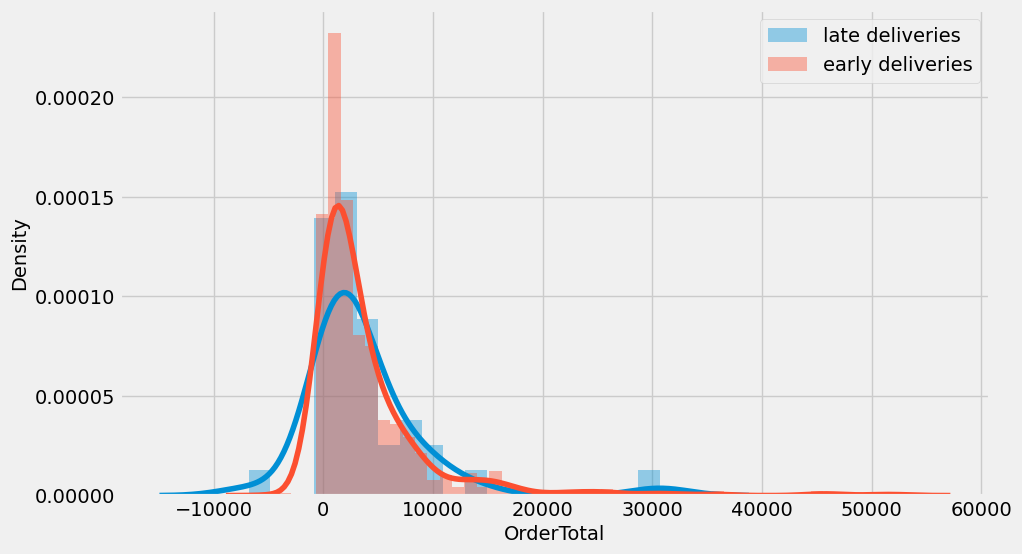

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(late_orders,label='late deliveries')
sns.distplot(early_orders,label='early deliveries')
plt.legend()
plt.show()


In [96]:
# Check for normality in early_orders
stat_early, p_early = stats.shapiro(early_orders)
if p_early > 0.05:
    print(f"early_orders is normally distributed, p valu {p_early}")
else:
    print(f"early_orders is not normally distributed, p valu {p_early}")

# Check for normality in late_orders
stat_late, p_late = stats.shapiro(late_orders)
if p_late > 0.05:
    print(f"late_orders is normally distributed, p valu {p_late}" )
else:
    print(f"late_orders is not normally distributed, p valu {p_late}")

early_orders is not normally distributed, p valu 3.210264079189474e-39
late_orders is not normally distributed, p valu 1.1377507291854272e-07


#### Checking for equal  variance using levenetest
#### Levene's Test for Equality of Variances

In [101]:
from scipy.stats import levene

stat, p = levene(early_orders, late_orders)
if p > 0.05:
    print(f"Variances are equal, p value {p}")
else:
    print(f"Variances are not equal, p value {p}")


Variances are equal, p value 0.969723430442833


In [103]:
t_stat, p_val = stats.ttest_ind(early_orders, late_orders)
if p_val < 0.05:
    print(f"Reject the null hypothesis: There is a significant difference between the means. p value {p_val}")
else:
    print(f"Fail to reject the null hypothesis: There is no significant difference between the means, p value {p_val}")

Fail to reject the null hypothesis: There is no significant difference between the means, p value 0.7400765952760241


Non-parametric Test since our data is not distributed normal 

In [106]:
from scipy.stats import mannwhitneyu

u_stat, p_val_u = mannwhitneyu(early_orders, late_orders)
if p_val_u < 0.05:
    print(f"Reject the null hypothesis: There is a significant difference between the distributions, p vale {p_val_u}")
else:
    print(f"Fail to reject the null hypothesis: There is no significant difference between the distributions, p vale {p_val_u}")


Fail to reject the null hypothesis: There is no significant difference between the distributions, p vale 0.9555250231587787


In [105]:
# Observed difference in means
obs_diff = early_orders.mean() - late_orders.mean()

# Combine the datasets
combined = np.concatenate([early_orders, late_orders])

# Number of permutations
n_permutations = 10000
count = 0

# Monte Carlo simulation
for _ in range(n_permutations):
    # Shuffle the combined dataset
    np.random.shuffle(combined)
    
    # Split into two groups
    perm_early = combined[:len(early_orders)]
    perm_late = combined[len(early_orders):]
    
    # Compute the difference in means for the shuffled groups
    perm_diff = perm_early.mean() - perm_late.mean()
    
    # Check if the permuted difference is as extreme as the observed difference
    if obs_diff > 0 and perm_diff >= obs_diff:
        count += 1
    elif obs_diff < 0 and perm_diff <= obs_diff:
        count += 1

# Calculate the p-value
p_value = count / n_permutations

print(f"Monte Carlo estimated p-value: {p_value}")

Monte Carlo estimated p-value: 0.4103


### In our investigation into the impact of late deliveries on the total value of orders, we employed multiple statistical tests, including the t-test, Mann-Whitney U test, and Monte Carlo simulation. Across all these tests, the p-values consistently exceeded the 0.05 significance threshold. This consistent outcome leads us to fail to reject the null hypothesis. Consequently, we conclude that late deliveries do not have a statistically significant effect on the total value of orders placed by customers. This suggests that other factors, beyond delivery timeliness, may play a more dominant role in influencing order values.

## Is there a statistically significant difference in performance of shipping companies?

### Null Hypothesis (H0): There is no statistically significant difference in the processing time among the shipping companies.

### Alternative Hypothesis (H1): There is a statistically significant difference in the processing time among the shipping companies.

In [109]:
# create new column processing time 

ordersl['process_time'] = (pd.to_datetime(ordersl['shippeddate']) - pd.to_datetime(ordersl['orderdate'])).dt.days

ordersl.head()

,orderid,customerid,orderdate,requireddate,shippeddate,shipvia,productid,unitprice,quantity,discount,OrderTotal,leship,late,process_time
0,10248,VINET,1996-07-04,1996-08-01,1996-07-16,3,11,58.6,27,0.0,1582.20,-16.0,no,12.0
1,10249,TOMSP,1996-07-05,1996-08-16,1996-07-10,1,14,61.0,49,0.0,2989.00,-37.0,no,5.0
2,10250,HANAR,1996-07-08,1996-08-05,1996-07-12,2,41,66.9,60,0.3,2809.80,-24.0,no,4.0
3,10251,VICTE,1996-07-08,1996-08-05,1996-07-15,1,22,49.2,41,0.1,1815.48,-21.0,no,7.0
4,10252,SUPRD,1996-07-09,1996-08-06,1996-07-11,2,20,94.0,105,0.1,8883.00,-26.0,no,2.0


In [110]:
ordersl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   orderid       830 non-null    int64  
 1   customerid    830 non-null    object 
 2   orderdate     830 non-null    object 
 3   requireddate  830 non-null    object 
 4   shippeddate   809 non-null    object 
 5   shipvia       830 non-null    int64  
 6   productid     830 non-null    int64  
 7   unitprice     830 non-null    float64
 8   quantity      830 non-null    int64  
 9   discount      830 non-null    float64
 10  OrderTotal    830 non-null    float64
 11  leship        809 non-null    float64
 12  late          830 non-null    object 
 13  process_time  809 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 90.9+ KB


In [112]:
# drop missing rows from orders1 dataframe 

ordersl.dropna(inplace=True)

In [114]:
ordersl.groupby('shipvia')['process_time'].mean()

shipvia
1    8.571429
2    9.234921
3    7.473896
Name: process_time, dtype: float64

Check Normality:

For each shipvia value, you'll want to check if the distribution of process_time is approximately normal.

Shapiro-Wilk Test p-value for shipvia 3: 2.633338268856572e-19
Shapiro-Wilk Test p-value for shipvia 1: 1.865945340400688e-18
Shapiro-Wilk Test p-value for shipvia 2: 1.2730089907340887e-20


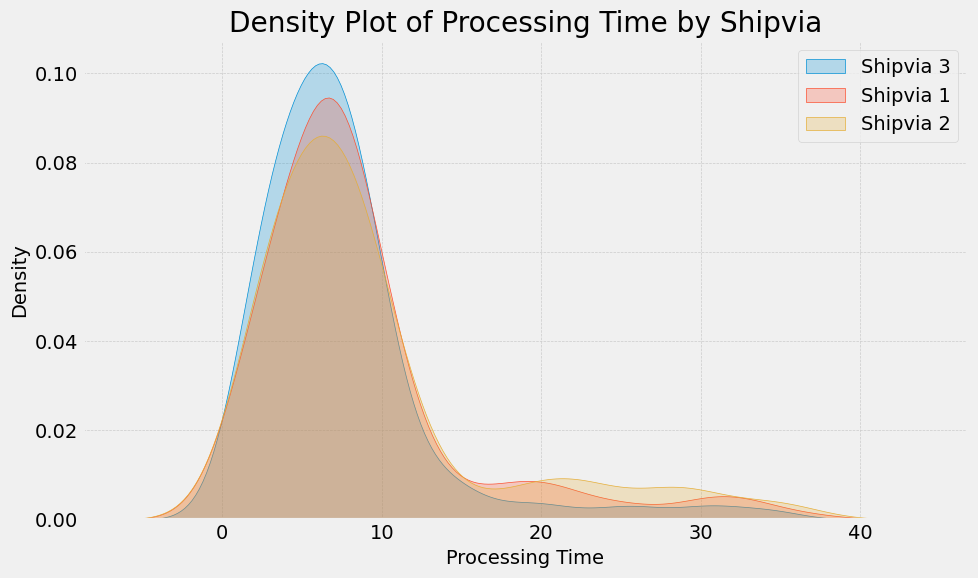

In [118]:
from scipy.stats import shapiro

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# For each shipvia value
for ship in ordersl['shipvia'].unique():
    data = ordersl[ordersl['shipvia'] == ship]['process_time']
    sns.kdeplot(data, label=f'Shipvia {ship}', shade=True)

    # Shapiro-Wilk Test
    _, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test p-value for shipvia {ship}: {p_value}")

# Customize the plot
plt.title('Density Plot of Processing Time by Shipvia')
plt.xlabel('Processing Time')
plt.ylabel('Density')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The Shapiro-Wilk test results indicate that the processing time distributions for all three shipping companies (shipvia 1, shipvia 2, and shipvia 3) deviate significantly from a normal distribution. With p-values well below the 0.05 threshold for each company, we reject the assumption of normality for the processing times.

Check Homogeneity of Variances:

In [116]:
from scipy.stats import levene

data1 = ordersl[ordersl['shipvia'] == 1]['process_time']
data2 = ordersl[ordersl['shipvia'] == 2]['process_time']
data3 = ordersl[ordersl['shipvia'] == 3]['process_time']

_, p_value = levene(data1, data2, data3)
print(f"Levene's Test p-value: {p_value}")

Levene's Test p-value: 0.0221302086644791


The Levene's Test was conducted to check if the processing times of the three shipping companies have similar variability. The result, with a p-value of 0.022, suggests that there are differences in the consistency of processing times among the companies. In simpler terms, not all companies are equally consistent in how quickly they process orders.

Parametric test - ANOVA 

In [121]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(data1, data2, data3)
print(f"One-Way ANOVA p-value: {p_value}")

One-Way ANOVA p-value: 0.00956265896432879


In [120]:
model = ols('process_time ~ C(shipvia)', data=ordersl).fit()
table = sm.stats.anova_lm(model, typ=1)

table

,df,sum_sq,mean_sq,F,PR(>F)
C(shipvia),2.0,433.501581,216.750790,4.676819,0.009563
Residual,806.0,37354.696194,46.345777,NaN,NaN


Non - Parametric test

In [123]:
from scipy.stats import kruskal

h_stat, p_value = kruskal(data1, data2, data3)
print(f"Kruskal-Wallis H-test statistic: {h_stat}")
print(f"Kruskal-Wallis H-test p-value: {p_value}")

Kruskal-Wallis H-test statistic: 5.891570932865593
Kruskal-Wallis H-test p-value: 0.05256075888636263


### Summary Report:

Our analysis aimed to determine if there's a significant difference in the processing times among the three shipping companies. The Kruskal-Wallis H-test, a non-parametric method, yielded a p-value of 0.0526, suggesting a borderline significant difference in the median processing times. On the other hand, the ANOVA, a parametric method, indicated a clear difference with a p-value of 0.0096.

### Conclusion:

Given the corroborative evidence from both tests, especially the clear significance from the ANOVA, we reject the null hypothesis. This suggests that there are indeed differences in processing times among the shipping companies. However, the borderline significance in the Kruskal-Wallis test advises caution, implying that while statistical differences exist, their practical implications should be further investigated.

### Which shipping company has the lowest processing time?

In [124]:
avg_processing_times = ordersl.groupby('shipvia')['process_time'].mean()
print(avg_processing_times)

shipvia
1    8.571429
2    9.234921
3    7.473896
Name: process_time, dtype: float64


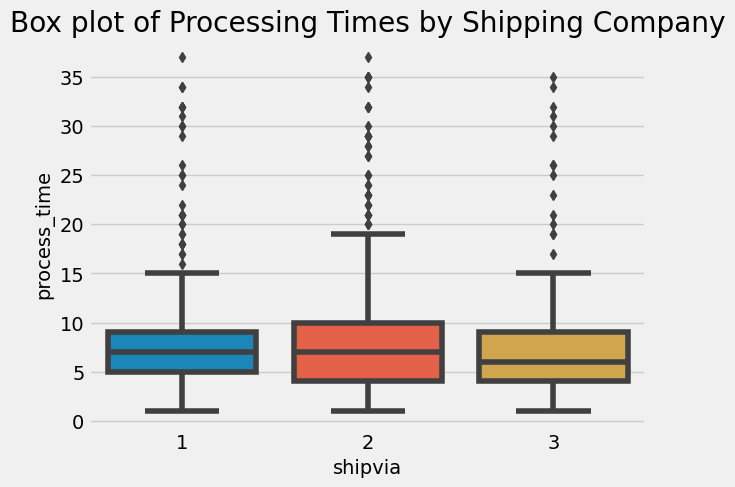

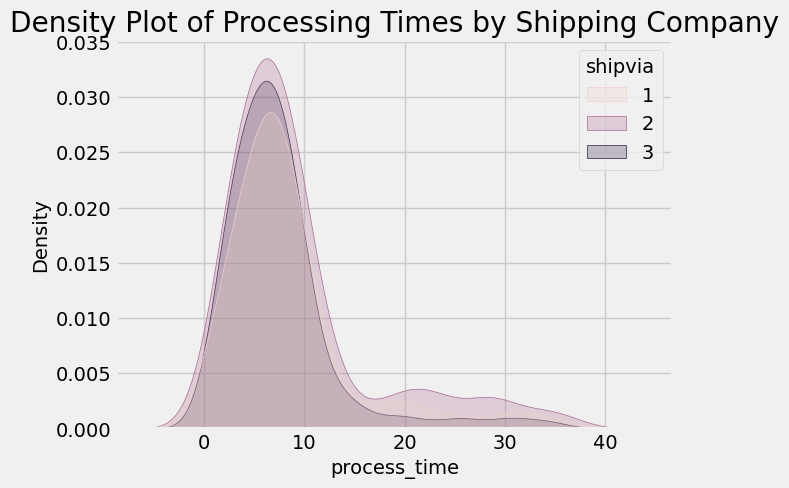

In [125]:
# Box plot
sns.boxplot(x='shipvia', y='process_time', data=ordersl)
plt.title('Box plot of Processing Times by Shipping Company')
plt.show()

# Density plot
sns.kdeplot(data=ordersl, x='process_time', hue='shipvia', fill=True)
plt.title('Density Plot of Processing Times by Shipping Company')
plt.show()

post-hoc Analysis:

In [126]:
# Extract the 'process_time' and 'shipvia' columns for the test
data = ordersl['process_time']
groups = ordersl['shipvia']

# Perform the Tukey HSD test
tukey_results = pairwise_tukeyhsd(data, groups, alpha=0.05)

# Print the results
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   0.6635 0.4872 -0.6982  2.0251  False
     1      3  -1.0975  0.173  -2.536  0.3409  False
     2      3   -1.761 0.0067 -3.1165 -0.4055   True
----------------------------------------------------


In [127]:
shippers.head()

,shipperid,companyname,phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931
3,4,Alliance Shippers,1-800-222-0451
4,5,UPS,1-800-782-7892


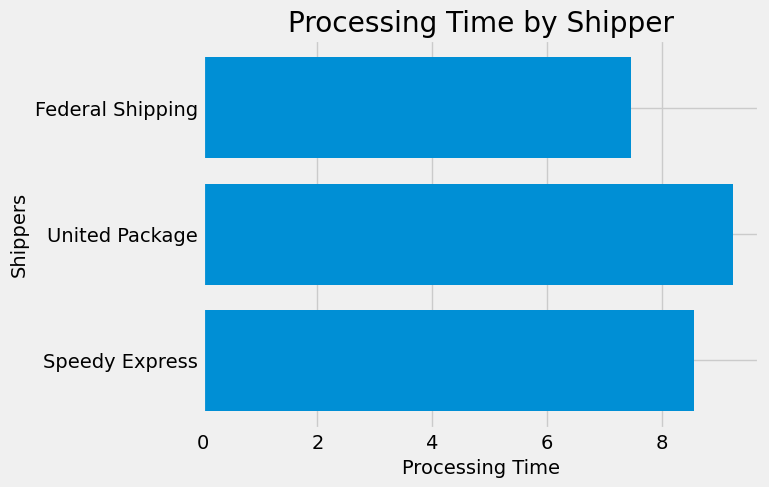

In [129]:
p_time = [8.57,9.24,7.47]
shipper = ('Speedy Express','United Package','Federal Shipping')
y_pos = np.arange(len(shipper))
# Create bars
plt.barh(y_pos, p_time)
# Create names on the x-axis
plt.yticks(y_pos, shipper)
# Show graphic
plt.ylabel('Shippers')
plt.xlabel('Processing Time')
plt.title('Processing Time by Shipper')
plt.show()

### The post-hoc analysis reveals a significant difference in processing times between United Package (shipvia 2) and Federal Shipping (shipvia 3), with Federal Shipping having a shorter average processing time by approximately 1.76 days. However, there's no significant difference in processing times between Speedy Express and the other two shipping companies. Thus, among the three, Federal Shipping demonstrates the most efficient processing performance.

##  Employee Sales Performance
## Is there a significant difference in the number of sales made by employees based on their tenure ?

### Null Hypothesis (H0): There is no significant difference in the number of sales made by employees based on their tenure.
### Alternative Hypothesis (H1): There is a significant difference in the number of sales made by employees based on their tenure.

In [146]:
# Joining the tables
sales_df = orders.merge(orders_details, on='orderid').merge(employees, on='employeeid')

# Extracting the necessary columns
selected_columns = ['employeeid', 'orderid', 'unitprice', 'discount', 'quantity', 'shippeddate', 'hiredate']
emply_sales = sales_df[selected_columns]

# Finding the latest shipped date in the dataset
latest_shipped_date = pd.to_datetime(emply_sales['shippeddate']).max()

# Calculating the tenure of each sale using the latest shipped date as the reference
emply_sales['tenure'] = (latest_shipped_date - pd.to_datetime(df['hiredate'])).dt.days // 365  # Tenure in years

emply_sales.head()


,employeeid,orderid,unitprice,discount,quantity,shippeddate,hiredate,tenure
0,5,10248,14.0,0.00,12,1996-07-16,1993-10-17,4
1,5,10248,9.8,0.00,10,1996-07-16,1993-10-17,4
2,5,10248,34.8,0.00,5,1996-07-16,1993-10-17,4
3,5,10254,3.6,0.15,15,1996-07-23,1993-10-17,4
4,5,10254,19.2,0.15,21,1996-07-23,1993-10-17,4


In [149]:
emply_sales['tenure'].value_counts()

4    721
6    666
5    661
3    107
Name: tenure, dtype: int64

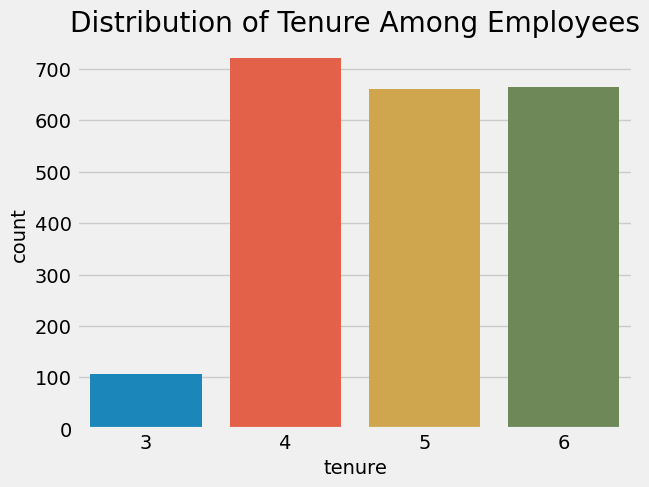

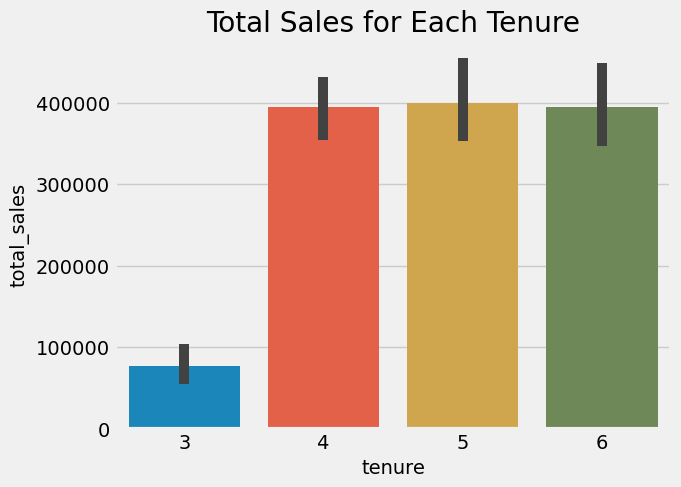

In [148]:
# Distribution of tenure
sns.countplot(data=emply_sales, x='tenure')
plt.title('Distribution of Tenure Among Employees')
plt.show()

# Total sales for each tenure
emply_sales['total_sales'] = emply_sales['unitprice'] * emply_sales['quantity'] * (1 - emply_sales['discount'])
sns.barplot(data=emply_sales, x='tenure', y='total_sales', estimator=sum)
plt.title('Total Sales for Each Tenure')
plt.show()

In [150]:
# Checking normality
sales_residuals = emply_sales['total_sales'] - emply_sales.groupby('tenure')['total_sales'].transform('mean')
_, p_normality = shapiro(sales_residuals)
print(f"Normality test p-value: {p_normality}")

Normality test p-value: 0.0


In [151]:
# Checking homogeneity of variances
sales_groups = [emply_sales['total_sales'][emply_sales['tenure'] == tenure] for tenure in emply_sales['tenure'].unique()]
_, p_variance = levene(*sales_groups)
print(f"Levene's test p-value: {p_variance}")

Levene's test p-value: 0.27673750910807976


In [156]:
# If assumptions are met, perform ANOVA, else Kruskal-Wallis
if p_normality > 0.05 and p_variance > 0.05:
    _, p_anova = f_oneway(*sales_groups)
    print(f"ANOVA p-value: {p_anova}")
else:
    _, p_kruskal = kruskal(*sales_groups)
    print(f"Kruskal-Wallis p-value: {p_kruskal}")
    

_, p_anova = f_oneway(*sales_groups)
print(f"ANOVA p-value: {p_anova}")

Kruskal-Wallis p-value: 0.6751041301842631
ANOVA p-value: 0.3111853947272747


In [157]:
# Tukey's HSD post-hoc comparison
posthoc = pairwise_tukeyhsd(emply_sales['total_sales'], emply_sales['tenure'])
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     3      4 -175.8535 0.2973 -433.9789  82.2719  False
     3      5  -118.226 0.6454 -377.8609 141.4089  False
     3      6 -129.5316 0.5736 -389.0307 129.9674  False
     4      5   57.6275 0.6869  -76.5441 191.7992  False
     4      6   46.3219 0.8104  -87.5868 180.2305  False
     5      6  -11.3056 0.9966 -148.1014 125.4902  False
--------------------------------------------------------


### Summary

We set out to understand if the length of time (tenure) an employee has been with the company affects their sales performance. In other words, does experience play a role in how well an employee sells?

**Findings:**

- We first used a test called the Kruskal-Wallis Test. This test helps us understand if sales distributions are different across various tenure groups. The result from this test showed that tenure doesn't seem to have a clear impact on sales distribution.

- Next, we used the ANOVA test. This test checks if the average sales are different across tenure groups. Again, the result indicated that the average sales made by employees are not significantly different based on how long they've been with the company.

- To be thorough, we also conducted a Tukey HSD test. This test dives deeper to see if there's a difference in sales performance between any two specific tenure groups. The results consistently showed that there's no significant difference in sales between any two specific groups of tenure.

**Conclusion:**

Based on our analysis, there's no evidence to suggest that the number of years an employee has been with the company affects their sales performance. Whether an employee is newer or has been with the company for a longer time, their sales performance seems to be on a similar level.


# Future Work

## Hypothesis Testing Scenarios

### Discounts and Order Quantity

**Problem Statement:** Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

**Test:** ANOVA (to compare means across multiple discount levels)

### Employee Sales Performance

**Problem Statement:** Is there a significant difference in the number of sales made by employees based on their tenure or region?

**Test:** T-Test or ANOVA (depending on the number of groups being compared)

### Order Frequency by Region

**Problem Statement:** Is there a significant association between a customer's region and the frequency of their orders?

**Test:** Chi-Square Test of Independence

### Product Popularity by Category

**Problem Statement:** Are certain product categories ordered more frequently than others?

**Test:** ANOVA or Chi-Square Test (depending on the nature of the data)

### Supplier Impact on Order Quantity

**Problem Statement:** Do certain suppliers contribute to a significantly higher order quantity than others?

**Test:** ANOVA

### Shipping Time Impact on Customer Satisfaction

**Problem Statement:** Does a longer shipping time lead to lower customer satisfaction ratings?

**Test:** Regression Analysis

### Price Elasticity of Products

**Problem Statement:** How does the price of a product influence its sales volume? Is there a significant relationship?

**Test:** Regression Analysis

### Seasonal Effects on Sales

**Problem Statement:** Are there certain months or seasons where sales are significantly higher?

**Test:** Time Series Analysis or T-Test

### Customer Lifetime Value by Region

**Problem Statement:** Is the average lifetime value of a customer significantly different across regions?

**Test:** ANOVA

### Effect of Discount Depth on Sales Volume

**Problem Statement:** Does offering deeper discounts (e.g., 20% vs. 10%) result in a significantly higher sales volume?

**Test:** Z-Test (especially if comparing to a larger population or benchmark)
